In [33]:
import librosa
import librosa.display
import IPython.display as ipd
import medleydb as mdb
import matplotlib.pyplot as plt
import numpy as np
import os

# 检查生成的完整标签/频谱 有没有问题

In [12]:
in_data = np.load('./inputs/ChrisJacoby_PigsFoot_mel2_input.npy')
out_data = np.load('./outputs/ChrisJacoby_PigsFoot_mel2_output.npy')
in_data.shape, out_data.shape

((6, 360, 31621), (360, 31621))

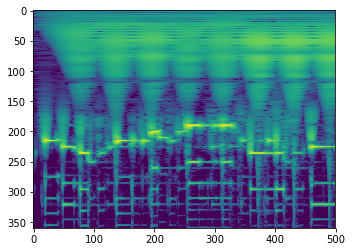

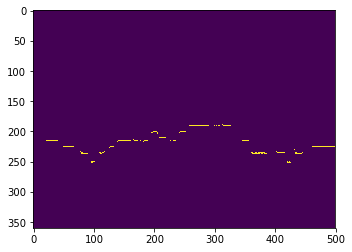

In [14]:
start = 0
plt.imshow(in_data[1,:,start:start+500])
plt.show()
plt.imshow(out_data[:,start:start+500])

In [1]:
try:
    !jupyter nbconvert --to python <??>.ipynb
except:
    pass

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook loss_function.ipynb to python
[NbConvertApp] Writing 1335 bytes to loss_function.py


# Argparse

In [ ]:
import argparse

parser = argparse.ArgumentParser()

parser.add_argument('--save_dir', help='目标存储目录')
parser.add_argument('--lr', help='学习率')
parser.add_argument('--saved_model', help='以训练过的模型')
parser.add_argument('-e', '--epoch', help='有几个epoch')

args = parser.parse_args()

print(args.save_dir, args.lr, args.saved_model, args.epoch)
print(typr(args.save_dir), type(args.lr), tpye(args.saved_model), type(args.epoch))

In [76]:
import mir_eval

In [77]:
ref_time, ref_freq = mir_eval.io.load_time_series('./mir_eval_learn/ref00.txt')
est_time, est_freq = mir_eval.io.load_time_series('./mir_eval_learn/est00.txt')

In [78]:
(ref_v, ref_c, est_v, est_c) = mir_eval.melody.to_cent_voicing(ref_time, ref_freq, est_time, est_freq, base_frequency=32.7)
overall_accuracy = mir_eval.melody.overall_accuracy(ref_v, ref_c, est_v, est_c)
print(overall_accuracy)

recall = mir_eval.melody.voicing_recall(ref_v, est_v)
print(recall)

false_alarm = mir_eval.melody.voicing_false_alarm(ref_v, est_v)
print(false_alarm)

rpa = mir_eval.melody.raw_pitch_accuracy(ref_v, ref_c, est_v, est_c)
print(rpa)

rca = mir_eval.melody.raw_chroma_accuracy(ref_v, ref_c, est_v, est_c)
print(rca)

0.963931718061674
0.9765342960288809
0.03248259860788863
0.964259927797834
0.964259927797834


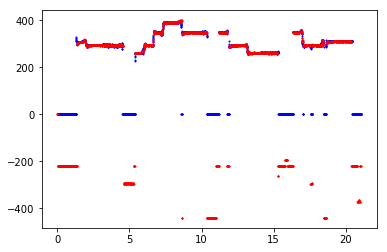

In [79]:
plt.scatter(ref_time, ref_freq, c='b', s=1)
plt.scatter(est_time, est_freq, c='r', s=1)

In [80]:
ref_time.shape, ref_freq.shape

((3632,), (3632,))

In [81]:
est_time.shape, est_freq.shape

((2106,), (2106,))

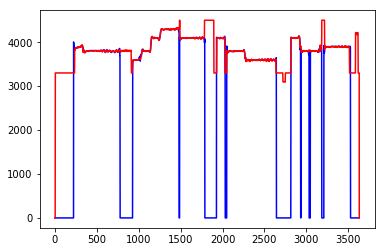

In [82]:
plt.plot(ref_c, c='b')
plt.plot(est_c, c='r')

In [83]:
ref_v, ref_v.shape # only 0 1

(array([0., 0., 0., ..., 0., 0., 0.]), (3632,))

In [84]:
est_v, est_v.shape

(array([0., 0., 0., ..., 0., 0., 0.]), (3632,))

In [85]:
ref_c.shape, est_c.shape

((3632,), (3632,))